All numeric money variables are in thousand of US dollars

- Firm size measures:
    - Book value of the firm = (totalassets-totalliabilities)
    - Market value = (historical stock price * number of shares) = (originalprice * sharesoutstanding)
- Profit Margin:
    - Operating profit margin = operating profit / sales
        - Operating profit = (revenue-cogs - sgae - otheropexp)
        - Cogs = Cost of good sold = variable cost
        - sgae = sales and general administrative expenses = fixed costs
        - otheropexp = other operating expenses
        - Ebit = earnings before interest and taxes = operating profit
        - ebit = revenue - cogs - sgae - otheropexp
        - operating profit margin = opm = ebit/revenue
    - Profit margin = Net income / sales
        - Net income = ebit - incometax - finexp
        - Income tax = what the firm pays in taxes (for the government) (impuesto sobre la renta)
        - Finexp = financial expenses = what the firm pays in interest expenses for any loan that the firm issued
        

#### General Questions:

What is the composition of US public firms in terms of size, sales performance and profitability?

Why some firms are more profitable than others? Which factors/variables are related to profitability?

#### Considering the most recent financial quarter of the dataset:

For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#columns = ["","","","","",""]
df_data = pd.read_csv("us2022q2a.csv")
df_firms = pd.read_csv("usfirms2022.csv")

df_firms

,Ticker,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,FLWS,1 800 Flowers Com Inc,1,Com A,US,Stock,Retail Trade,NASDAQ,Trade,Retail Trade,-
1,TXG,"10x Genomics, Inc",2,Com A,US,Stock,Manufacturing,NASDAQ,Electric Electron,"Navigational, Measuring, Electromedical, and C...",-
2,GOED,1847 Goedeker Inc,3,Com,US,Stock,Retail Trade,AMEX,Trade,Furniture and Home Furnishings Stores,-
3,ONEM,"1life Healthcare, Inc",4,Com,US,Stock,Health Care and Social Assistance,NASDAQ,Other,Offices of Physicians,-
4,SRCE,1st Source Corp,5,Com,US,Stock,Finance and Insurance,NASDAQ,Finance and Insurance,Depository Credit Intermediation,-
...,...,...,...,...,...,...,...,...,...,...,...
3603,ZUO,"Zuora, Inc",3604,Com A,US,Stock,Information,NYSE,Software & Data,Software Publishers,-
3604,ZWS,Zurn Elkay Water Solutions Corp,3605,Com,US,Stock,Manufacturing,NYSE,Industrial Machin,Other General Purpose Machinery Manufacturing,-
3605,ZY,Zymergen Inc,3606,Com,US,Stock,"Professional, Scientific, and Technical Services",NASDAQ,Other,Scientific Research and Development Services,-
3606,ZYNE,"Zynerba Pharmaceuticals, Inc",3607,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-


In [4]:
df_firms
df_firms['Sector NAICS\nlevel 1'].value_counts()

Manufacturing                                                               1567
Finance and Insurance                                                        703
Information                                                                  263
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             145
Administrative and Support and Waste Management and Remediation Services     133
Mining, Quarrying, and Oil and Gas Extraction                                104
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               69
Real Estate and Rental and Leasing                                            68
Health Care and Social Assis

In [5]:
df_data.rename(columns = {'firm':'Ticker'}, inplace = True)
df_data

,Ticker,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000,1
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000,2
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000,3
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000,4
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324441,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.290000,5.2900,41251.537,6.0,2021,2
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021,3
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021,4
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022,1


In [6]:
## merge
df_merged = pd.merge(df_data, df_firms, on="Ticker", how="left")

In [7]:
df_merged

,Ticker,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Agilent Technologies, Inc",94.0,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,"Agilent Technologies, Inc",94.0,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,"Agilent Technologies, Inc",94.0,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,"Agilent Technologies, Inc",94.0,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,"Agilent Technologies, Inc",94.0,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324441,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,"Zynerba Pharmaceuticals, Inc",3607.0,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,"Zynerba Pharmaceuticals, Inc",3607.0,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,"Zynerba Pharmaceuticals, Inc",3607.0,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,"Zynerba Pharmaceuticals, Inc",3607.0,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-


In [8]:
## take the date from string type to date type

df_merged['qdate'] = pd.PeriodIndex(df_merged['q'], freq="Q")
df_merged.set_index(['Ticker','qdate'],inplace=True)

df_merged

q    revenue       cogs          sgae  otheropexp  \
Ticker qdate                                                            
A      2000Q1  2000q1        NaN        NaN           NaN         NaN   
       2000Q2  2000q2  2485000.0  1261000.0  1.010000e+06         0.0   
       2000Q3  2000q3  2670000.0  1369000.0  1.091000e+06         0.0   
       2000Q4  2000q4  3372000.0  1732000.0  1.182000e+06         0.0   
       2001Q1  2001q1  2841000.0  1449000.0  1.113000e+06         0.0   
...               ...        ...        ...           ...         ...   
ZYNE   2021Q2  2021q2        0.0        0.0  9.838494e+03         0.0   
       2021Q3  2021q3        0.0        0.0  1.021065e+04         0.0   
       2021Q4  2021q4        0.0        0.0  8.836436e+03         0.0   
       2022Q1  2022q1        0.0        0.0  8.903915e+03         0.0   
       2022Q2  2022q2        0.0        0.0  9.168770e+03         0.0   

                extraincome  finexp  incometax  totalassets  totalliabilities  \
Ticker qdate                                                                    
A      2000Q1           NaN     NaN        NaN          NaN               NaN   
       2000Q2  42000.000000   0.000    90000.0  7321000.000       2679000.000   
       2000Q3  28000.000000   0.000    83000.0  7827000.000       2925000.000   
       2000Q4  10000.000000   0.000   163000.0  8425000.000       3160000.000   
       2001Q1  -6000.000000   0.000   119000.0  9208000.000       3667000.000   
...                     ...     ...        ...          ...               ...   
ZYNE   2021Q2   -117.528220  -5.943        0.0    98195.904         10496.647   
       2021Q3   -376.636750  -5.038        0.0    89996.170         11309.171   
       2021Q4     16.937906  -4.433        0.0    81171.507         10258.173   
       2022Q1    317.252110 -96.044        0.0    74381.029          9214.059   
       2022Q2   -775.927860 -91.691        0.0    67006.959          9765.086   

               ...                          Name       N  Class  \
Ticker qdate   ...                                                
A      2000Q1  ...     Agilent Technologies, Inc    94.0    Com   
       2000Q2  ...     Agilent Technologies, Inc    94.0    Com   
       2000Q3  ...     Agilent Technologies, Inc    94.0    Com   
       2000Q4  ...     Agilent Technologies, Inc    94.0    Com   
       2001Q1  ...     Agilent Technologies, Inc    94.0    Com   
...            ...                           ...     ...    ...   
ZYNE   2021Q2  ...  Zynerba Pharmaceuticals, Inc  3607.0    Com   
       2021Q3  ...  Zynerba Pharmaceuticals, Inc  3607.0    Com   
       2021Q4  ...  Zynerba Pharmaceuticals, Inc  3607.0    Com   
       2022Q1  ...  Zynerba Pharmaceuticals, Inc  3607.0    Com   
       2022Q2  ...  Zynerba Pharmaceuticals, Inc  3607.0    Com   

               Country\nof Origin  Type of Asset  Sector NAICS\nlevel 1  \
Ticker qdate                                                              
A      2000Q1                  US          Stock          Manufacturing   
       2000Q2                  US          Stock          Manufacturing   
       2000Q3                  US          Stock          Manufacturing   
       2000Q4                  US          Stock          Manufacturing   
       2001Q1                  US          Stock          Manufacturing   
...                           ...            ...                    ...   
ZYNE   2021Q2                  US          Stock          Manufacturing   
       2021Q3                  US          Stock          Manufacturing   
       2021Q4                  US          Stock          Manufacturing   
       2022Q1                  US          Stock          Manufacturing   
       2022Q2                  US          Stock          Manufacturing   

               Exchange / Src  Sector\nEconomatica  \
Ticker qdate                                         
A      2000Q1            NYSE    Electric Electron   
      

In [9]:
df_merged.drop(columns=["Name","N","Class","Country\nof Origin",
                        "Type of Asset","Exchange / Src","Sector NAICS\nlast available","partind"], inplace=True)

In [10]:
df_merged

q    revenue       cogs          sgae  otheropexp  \
Ticker qdate                                                            
A      2000Q1  2000q1        NaN        NaN           NaN         NaN   
       2000Q2  2000q2  2485000.0  1261000.0  1.010000e+06         0.0   
       2000Q3  2000q3  2670000.0  1369000.0  1.091000e+06         0.0   
       2000Q4  2000q4  3372000.0  1732000.0  1.182000e+06         0.0   
       2001Q1  2001q1  2841000.0  1449000.0  1.113000e+06         0.0   
...               ...        ...        ...           ...         ...   
ZYNE   2021Q2  2021q2        0.0        0.0  9.838494e+03         0.0   
       2021Q3  2021q3        0.0        0.0  1.021065e+04         0.0   
       2021Q4  2021q4        0.0        0.0  8.836436e+03         0.0   
       2022Q1  2022q1        0.0        0.0  8.903915e+03         0.0   
       2022Q2  2022q2        0.0        0.0  9.168770e+03         0.0   

                extraincome  finexp  incometax  totalassets  totalliabilities  \
Ticker qdate                                                                    
A      2000Q1           NaN     NaN        NaN          NaN               NaN   
       2000Q2  42000.000000   0.000    90000.0  7321000.000       2679000.000   
       2000Q3  28000.000000   0.000    83000.0  7827000.000       2925000.000   
       2000Q4  10000.000000   0.000   163000.0  8425000.000       3160000.000   
       2001Q1  -6000.000000   0.000   119000.0  9208000.000       3667000.000   
...                     ...     ...        ...          ...               ...   
ZYNE   2021Q2   -117.528220  -5.943        0.0    98195.904         10496.647   
       2021Q3   -376.636750  -5.038        0.0    89996.170         11309.171   
       2021Q4     16.937906  -4.433        0.0    81171.507         10258.173   
       2022Q1    317.252110 -96.044        0.0    74381.029          9214.059   
       2022Q2   -775.927860 -91.691        0.0    67006.959          9765.086   

               ...  longdebt  stockholderequity   adjprice  originalprice  \
Ticker qdate   ...                                                          
A      2000Q1  ...       NaN                NaN  63.761670       104.0000   
       2000Q2  ...     0.000        4642000.000  45.215607        73.7500   
       2000Q3  ...     0.000        4902000.000  30.003238        48.9375   
       2000Q4  ...     0.000        5265000.000  33.566841        54.7500   
       2001Q1  ...     0.000        5541000.000  18.840347        30.7300   
...            ...       ...                ...        ...            ...   
ZYNE   2021Q2  ...   468.385          87699.257   5.290000         5.2900   
       2021Q3  ...   411.237          78686.999   4.240000         4.2400   
       2021Q4  ...   353.694          70913.334   2.880000         2.8800   
       2022Q1  ...   295.754          65166.970   2.050000         2.0500   
       2022Q2  ...   237.414          57241.873   1.140000         1.1400   

               sharesoutstanding  fiscalmonth  year  cto  \
Ticker qdate                                               
A      2000Q1         452000.000          NaN  2000    1   
       2000Q2         452271.967          6.0  2000    2   
       2000Q3         453014.579          9.0  2000    3   
       2000Q4         456366.381         12.0  2000    4   
       2001Q1         456769.737          3.0  2001    1   
...                          ...          ...   ...  ...   
ZYNE   2021Q2          41251.537          6.0  2021    2   
       2021Q3          41251.537          9.0  2021    3   
       2021Q4          41217.537         12.0  2021    4   
       2022Q1          42447.037          3.0  2022    1   
       2022Q2          43595.959          6.0  2022    2   

               Sector NAICS\nlevel 1 Sector\nEconomatica  
Ticker qdate                                              
A      2000Q1          Manufacturing   Electric Electron  
       2000Q2          Manufacturing   Electric Electron

In [11]:
df_merged.describe()

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
count,1.586140e+05,1.583090e+05,1.583090e+05,1.583110e+05,1.586130e+05,1.586140e+05,1.586140e+05,1.598080e+05,1.598080e+05,1.296770e+05,1.595950e+05,1.597400e+05,1.591540e+05,159234.000000,1.578220e+05,159814.000000,324446.000000,324446.000000
mean,1.452993e+06,8.014647e+05,4.202786e+05,4.035049e+04,-1.461388e+04,2.041849e+04,4.149881e+04,1.667076e+07,1.315268e+07,4.289518e+05,2.959734e+06,3.518162e+06,3.887274e+03,142.157427,2.011844e+05,7.447652,2010.755429,2.477744
std,5.403176e+06,3.747465e+06,1.740520e+06,7.671071e+05,5.487202e+05,1.128232e+05,3.310557e+05,1.027367e+08,9.195619e+07,4.603232e+06,1.495196e+07,1.417453e+07,3.523581e+05,4835.897299,6.922988e+05,3.345909,6.498747,1.117795
min,-4.788351e+06,-4.460800e+06,-3.373000e+06,-6.967000e+06,-4.149100e+07,-3.439000e+06,-3.564500e+07,0.000000e+00,0.000000e+00,-1.500600e+04,0.000000e+00,-9.052000e+07,1.158507e-02,0.002700,0.000000e+00,0.000000,2000.000000,1.000000
25%,3.379850e+04,2.280000e+02,9.332000e+03,0.000000e+00,-2.140000e+03,0.000000e+00,0.000000e+00,3.664025e+05,1.407208e+05,0.000000e+00,7.000000e+03,1.237102e+05,9.910257e+00,11.160000,2.508096e+04,3.000000,2005.000000,1.000000
50%,2.051753e+05,4.382300e+04,5.636700e+04,0.000000e+00,0.000000e+00,7.950000e+02,2.493000e+03,1.711736e+06,9.899975e+05,6.452000e+03,2.550000e+05,5.681570e+05,2.085878e+01,25.800000,5.589535e+04,6.000000,2011.000000,2.000000
75%,8.600000e+05,3.707180e+05,2.179200e+05,3.300000e+01,6.975720e+02,1.300000e+04,2.018475e+04,6.618525e+06,4.359462e+06,8.182700e+04,1.503724e+06,1.975248e+06,4.229000e+01,49.040000,1.442091e+05,9.000000,2016.000000,3.000000
max,1.528710e+08,1.155220e+08,1.316620e+08,6.901800e+07,1.291970e+08,6.955000e+06,3.918600e+07,3.954687e+09,3.668788e+09,3.002790e+08,5.116530e+08,5.081410e+08,7.011719e+07,528921.000000,9.821405e+07,12.000000,2022.000000,4.000000


In [12]:
aux = df_merged['q'] == '2022q2'
aux
df_merged2022q2 = df_merged[aux]
df_merged2022q2

,,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Sector NAICS\nlevel 1,Sector\nEconomatica
Ticker,qdate,,,,,,,,,,,,,,,,,,,,,
A,2022Q2,2022q2,1607000.0,746000.0,5.010000e+05,0.0,-7000.00000,20000.000,59000.0,1.045500e+07,5.333000e+06,...,2.730000e+06,5122000.000,118.560000,118.7700,298708.056,6.0,2022,2,Manufacturing,Electric Electron
AA,2022Q2,2022q2,3644000.0,2767000.0,2.200000e+05,-75000.0,81000.00000,30000.000,234000.0,1.570900e+07,8.417000e+06,...,1.725000e+06,7292000.000,45.487956,45.5800,184448.686,6.0,2022,2,Manufacturing,Basic & Fab Metal
AAIC,2022Q2,2022q2,10900.0,6374.0,0.000000e+00,0.0,-3417.00000,0.000,802.0,1.084755e+06,8.710570e+05,...,2.089690e+05,213698.000,3.250000,3.2500,35016.392,6.0,2022,2,Finance and Insurance,Funds
AAL,2022Q2,2022q2,13422000.0,0.0,1.240500e+07,0.0,25000.00000,439000.000,127000.0,6.796300e+07,7.638500e+07,...,3.496300e+07,-8422000.000,12.680000,12.6800,649514.848,6.0,2022,2,Transportation and Warehousing,Transportat Serv
AAME,2022Q2,2022q2,44669.0,0.0,4.678400e+04,0.0,0.00000,0.000,-436.0,3.792740e+05,2.701730e+05,...,3.373800e+04,109101.000,2.670000,2.6700,20398.497,6.0,2022,2,Finance and Insurance,Finance and Insurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,2022Q2,2022q2,45542.0,28168.0,2.407400e+04,8043.0,3662.00000,0.000,9.0,1.127380e+05,2.553900e+04,...,3.680000e+02,87199.000,2.810000,2.8100,67209.461,6.0,2022,2,Manufacturing,Food & Beverage
ZVO,2022Q2,2022q2,51380.0,34995.0,2.610800e+04,-8882.0,-3824.00000,0.000,8.0,8.543300e+04,7.882800e+04,...,0.000000e+00,6605.000,0.970100,0.9701,34095.968,6.0,2022,2,Educational Services,Other
ZWS,2022Q2,2022q2,284200.0,170400.0,6.000000e+04,300.0,-600.00000,5200.000,11300.0,1.176300e+06,9.469000e+05,...,5.378000e+05,229400.000,27.179735,27.2400,125967.533,6.0,2022,2,Manufacturing,Industrial Machin


### Considering the most recent financial quarter of the dataset:

In [13]:
df_merged2022q2.index
df_merged2022q2.columns
df_merged2022q2['lprice'] = df_merged2022q2.groupby(['Ticker'])['adjprice'].shift(4)
df_merged2022q2[['q','adjprice','lprice']]
df_merged2022q2.loc['ADT':'ADTN',['adjprice','lprice']].iloc[84:98,]

,,adjprice,lprice
Ticker,qdate,,


In [14]:
from heapq import merge
import numpy as np
df_merged2022q2['lprice']=df_merged2022q2.groupby(['Ticker'])['adjprice'].shift(4)
df_merged2022q2['r'] = np.log(df_merged2022q2['adjprice']) - np.log(df_merged2022q2['lprice'])
df_merged2022q2['r2'] = np.log(df_merged2022q2['adjprice']) - np.log(df_merged2022q2.groupby(['Ticker'])['adjprice'].shift(4))

df_merged2022q2.loc['ADT':'ADTN',['adjprice','lprice','r','r2']].iloc[85:96,]


,,adjprice,lprice,r,r2
Ticker,qdate,,,,


Show how many firms by industry there are in the sample

In [15]:
#plt.plot(df_merged['Sector NAICS\nlevel 1'].value_counts())
#plt.bar(df_merged['Sector NAICS\nlevel 1'],df_merged['Ticker'].value_counts())
#df_merged["qdate"].value_counts()
#df_merged['Sector NAICS\nlevel 1'].value_counts()
#df_merged["Sector NAICS\nlevel 1"]
df_merged2022q2['Sector NAICS\nlevel 1'].value_counts()


Manufacturing                                                               1565
Finance and Insurance                                                        701
Information                                                                  261
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             145
Administrative and Support and Waste Management and Remediation Services     133
Mining, Quarrying, and Oil and Gas Extraction                                103
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               69
Real Estate and Rental and Leasing                                            68
Health Care and Social Assis

For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

Mediana: 458532.0


,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,5.704446e+06,NaN,5704446.0,5.704446e+06,5704446.000,5704446.00,5704446.0
Accommodation and Food Services,68.0,5.139213e+05,2.456108e+06,-8658900.0,1.828125e+04,243717.500,989514.25,7289000.0
Administrative and Support and Waste Management and Remediation Services,124.0,2.819477e+06,7.323975e+06,-1715647.0,9.187999e+04,566167.000,2048337.50,46515000.0
"Agriculture, Forestry, Fishing and Hunting",15.0,3.629560e+06,6.806214e+06,14751.0,2.473960e+05,1104345.000,3283850.00,26071000.0
"Arts, Entertainment, and Recreation",19.0,5.394410e+06,2.206931e+07,-1081020.0,-1.253620e+05,67242.769,468964.00,96433000.0
Construction,44.0,2.535521e+06,4.271095e+06,83162.0,4.109848e+05,998146.500,2585043.50,21789774.0
Educational Services,14.0,8.931767e+05,1.110081e+06,6605.0,2.377335e+05,649699.000,966118.00,4322243.0
Finance and Insurance,663.0,5.482677e+06,2.071494e+07,-5438611.0,2.961440e+05,1049158.000,3446231.50,286143000.0
Health Care and Social Assistance,59.0,1.080145e+06,1.919774e+06,-1656000.0,1.071690e+05,451385.000,1202843.50,10400700.0


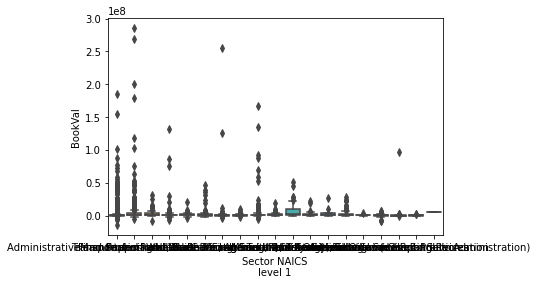

In [16]:
df_merged2022q2['BookVal'] = df_merged2022q2['totalassets'] - df_merged2022q2['totalliabilities']

sns.boxplot(x='Sector NAICS\nlevel 1', y='BookVal', data=df_merged2022q2)
print("Mediana: " + str(df_merged2022q2['BookVal'].median()))
df_merged2022q2.groupby('Sector NAICS\nlevel 1')['BookVal'].describe()



1106556.4629300002

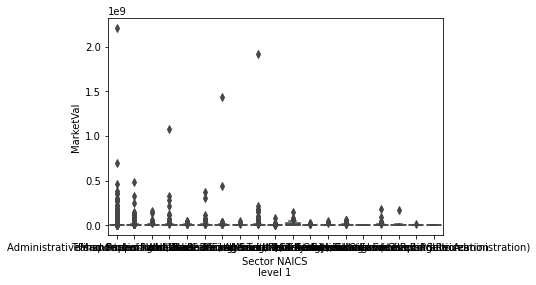

In [17]:
#Market value = (historical stock price * number of shares) 
# = (originalprice * sharesoutstanding)
df_merged2022q2['MarketVal'] = df_merged2022q2['originalprice'] * df_merged2022q2['sharesoutstanding']
sns.boxplot(x='Sector NAICS\nlevel 1', y='MarketVal', data=df_merged2022q2)
df_merged2022q2['MarketVal'].median()



For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

In [18]:
df_merged2022q2['ebit'] = df_merged2022q2['revenue'] - df_merged2022q2['cogs'] - df_merged2022q2['sgae'] - df_merged2022q2['otheropexp']

In [19]:
df_merged2022q2['NetIncome'] = df_merged2022q2['ebit'] - df_merged2022q2['finexp'] - df_merged2022q2['incometax'] + df_merged2022q2['extraincome']

df_merged2022q2['ProfMar'] = df_merged2022q2['NetIncome'] / df_merged2022q2['revenue']
df_merged2022q2.groupby('Sector NAICS\nlevel 1')['ProfMar'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,0.457850,NaN,0.457850,0.457850,0.457850,0.457850,0.457850
Accommodation and Food Services,67.0,0.010241,0.264335,-1.508883,-0.001980,0.051732,0.122229,0.546401
Administrative and Support and Waste Management and Remediation Services,124.0,-0.158377,1.430017,-15.036858,-0.031459,0.040445,0.109016,0.612446
"Agriculture, Forestry, Fishing and Hunting",15.0,-0.028357,0.287370,-0.979005,0.004027,0.033390,0.107970,0.185485
"Arts, Entertainment, and Recreation",19.0,-0.035906,0.546643,-2.037859,0.031007,0.098742,0.160037,0.582489
Construction,44.0,0.273472,1.302566,-0.438356,0.026429,0.081419,0.138511,8.685034
Educational Services,14.0,-0.036173,0.220928,-0.735449,-0.054122,0.015267,0.060190,0.153664
Finance and Insurance,663.0,NaN,NaN,-inf,0.075432,0.258436,0.376087,inf
Health Care and Social Assistance,59.0,-inf,NaN,-inf,-0.366534,-0.047305,0.048423,0.125085


<AxesSubplot:xlabel='Sector NAICS\nlevel 1', ylabel='ProfMar'>

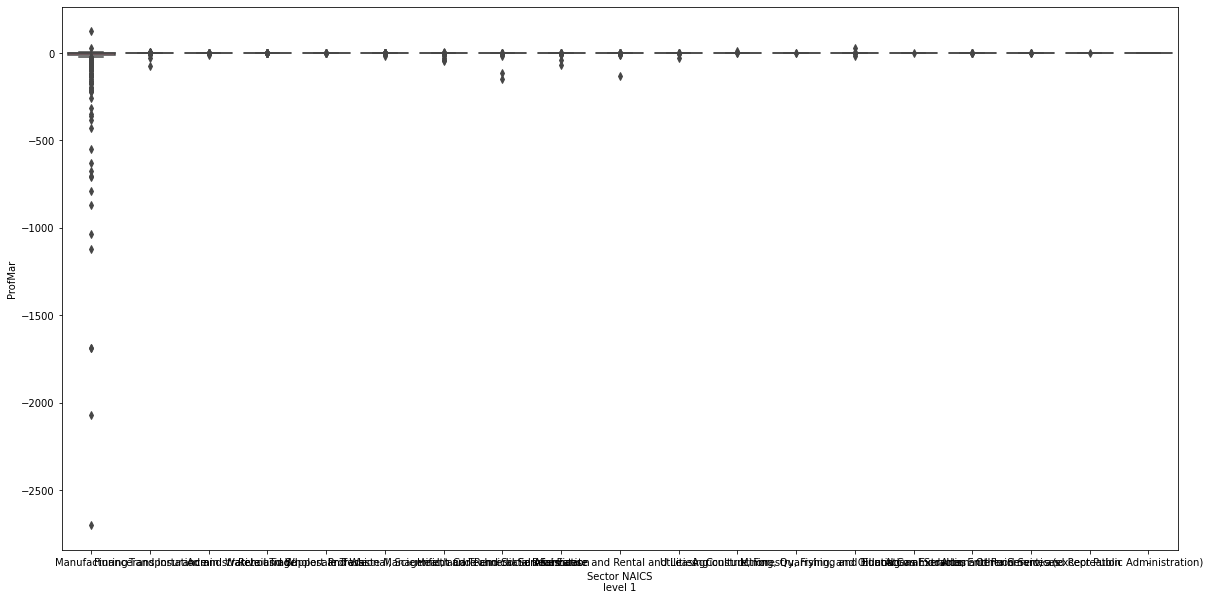

In [20]:
#plt.plot(df_merged['Sector NAICS\nlevel 1'],df_merged['ProfMar'])
#df_merged2022q2.plot("Sector NAICS\nlevel 1", "ProfMar", kind='scatter')

plt.figure(figsize=(20,10))
sns.boxplot(x='Sector NAICS\nlevel 1', y='ProfMar', data=df_merged2022q2)

In [21]:
df_merged2022q2['MarketVal'].sort_values(ascending=False).head(10)

Ticker  qdate 
AAPL    2022Q2    2.212838e+09
MSFT    2022Q2    1.920840e+09
GOOGL   2022Q2    1.435042e+09
AMZN    2022Q2    1.080624e+09
TSLA    2022Q2    6.976698e+08
BRK_A   2022Q2    6.015139e+08
UNH     2022Q2    4.818731e+08
JNJ     2022Q2    4.671001e+08
META    2022Q2    4.363946e+08
NVDA    2022Q2    3.789750e+08
Name: MarketVal, dtype: float64

In [22]:
df_merged2022q2['BookVal'].sort_values(ascending=False).head(10)

Ticker  qdate 
BRK_A   2022Q2    461229000.0
JPM     2022Q2    286143000.0
BAC     2022Q2    269118000.0
GOOGL   2022Q2    255419000.0
C       2022Q2    199626000.0
XOM     2022Q2    184508000.0
WFC     2022Q2    179793000.0
MSFT    2022Q2    166542000.0
CVX     2022Q2    154562000.0
T       2022Q2    135307000.0
Name: BookVal, dtype: float64